## Compton Scattering Lab - Part I


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
%matplotlib inline

# Make Graphs and Text larger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

In [13]:
# Recorded Data

angles = np.arange(20,95,5)
anglesRad = angles * (np.pi/180)
times = np.array([158.78, 189.46, 204.70, 165.20, 231.26, 272.08,286.5,329.8,386.46,409.1,522.82,567.66,631.9,671.32,667.1])

counts =np.array([12554, 12503, 15346, 10245, 11427, 10791,10271,10770,10550,10323,11181,10961,10551,10442,10066])
countsError=np.array([520, 564, 408, 426, 319, 370,429,512,463,469,458,427,453,447,452])

#Engergies converted in to MeV
energies = np.array([602.9e-3,580.85e-3,588.18e-3,537.06e-3, 495.3e-3, 475.29e-3, 450.11e-3,426.81e-3,407.62e-3,387.42e-3,361.77e-3,344.87e-3,328.10e-3,312.80e-3,301.9e-3])
energyErrors = np.array([0.01e-3]*len(energies))

In [14]:
len(times), len(counts), len(countsError), len(energies), len(angles),len(energyErrors)


(15, 15, 15, 15, 15, 15)

In [15]:
# Solution for calculating χ2 sum, reduced χ2 and χ2 P-value for fitting functions

from scipy.stats import chi2  

def chi_squared_sum(measured, expected, errors): # function corresponding to the formula provided (above)
    return np.sum(((measured-expected)/errors)**2)

### Plotting $1/E_{\gamma '}$ against $(1-cos(\theta))$

Data best fit slope : 1.849e+00 +\- 5.402e-05
Data best intercept : 1.531e+00 +\- 1.760e-05


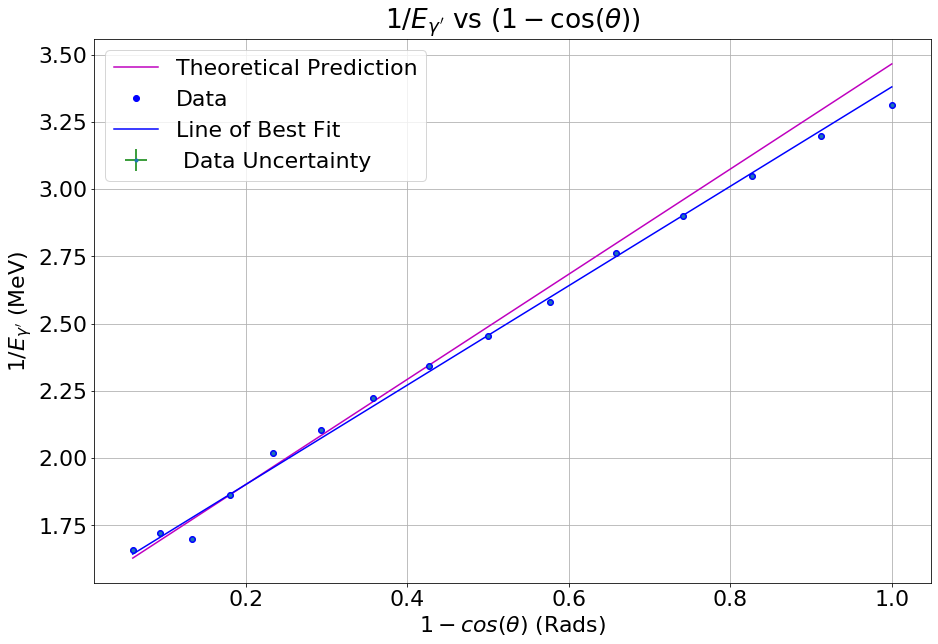

In [16]:
x = 1- np.cos((anglesRad))
y = 1/energies

def line(x,m,c):
    return (m*x) +c

yerrors = ((1e-5)/(energies))*y
coef = ((np.pi/1800)**2)
xerrors = np.sqrt(coef*((np.sin(anglesRad))**2))

popt, pcov = curve_fit(line, x, y, p0=[1.51,1.956], sigma = yerrors, absolute_sigma=True)
datafit = line(x,*popt)

plt.plot(x,line(x,1.956,1.51),'m-',label = 'Theoretical Prediction')
plt.plot(x,y,'bo',label='Data')
plt.errorbar(x,y, yerr=yerrors,xerr=xerrors, fmt='.',ecolor = 'g',label=' Data Uncertainty')
plt.plot(x,datafit,'b-',label='Line of Best Fit ')
plt.grid(True)
plt.title(r"$1/E_{\gamma'}$ vs $(1-\cos(\theta))$")
plt.ylabel(r"$1/E_{\gamma'}$ (MeV)")
plt.xlabel(r"$1 - cos(\theta)$ (Rads)")
plt.legend();
print(f'Data best fit slope : {popt[0]:.3e} +\- {np.sqrt(pcov[0,0]):.3e}')
print(f'Data best intercept : {popt[1]:.3e} +\- {np.sqrt(pcov[1,1]):.3e}' )

### Plotting / Calculating Differential Cross Section

In [20]:
def steradians(ang):
    return ((180/np.pi)**2)*(ang)

def KleinNishina(ang): #in cm squared / steradians
    alpha = 1.29
    part1a = (1+(np.cos(ang))**2)
    part1b = (1+((alpha)*(1-np.cos(ang))))**2
    part2a = (alpha**2)*((1-np.cos(ang))**2)
    part2b = (1+(np.cos(ang))**2)*(1+((alpha)*(1-np.cos(ang))))
    r0 = 2.82e-13
    return ((r0**2)/2)*(part1a/part1b)*(1+(part2a/part2b))

def peakEfficiency(energy): #has to be in MeV
    return (0.1522)*((energy)**(-1.1325))

def SumGamma(counts,time,energy): #Check the wording of this, is it (counts/time)/PeakEfficiency or Counts/time*peakEff
    return (counts/time)/(peakEfficiency(energy))

def Differential_CS(Gsum,N): # differential cross section
    deltaOmega = (np.pi*((0.9)**2))/(26**2)
    I = (1.013e6)*np.exp(-1*((259/6)/43.48))
    return Gsum/(N*deltaOmega*I)

Ne = ((79.3)*(6.0221409e23)*(13))/(27) # Number of electrons in scattering sample

def exponential(x,a,b): 
    return (a)*np.exp(-b*x)
    
I = (1.013e6)*np.exp(-1*((259/6)/43.48))


In [21]:
theoryKN = KleinNishina(anglesRad) 

Gsum = SumGamma(counts,times,energies)*(np.mean(theoryKN)/np.mean(Differential_CS(Gsum,Ne)))
xs = np.linspace(0.345,1.6,1000)



popt1,pcov1 = curve_fit(exponential, anglesRad, Differential_CS(Gsum,Ne), sigma =countsError, p0=[0.65e-25,1.85], absolute_sigma=True)

plt.plot(anglesRad,theoryKN,'m-',label ='Theoretical Predictions')
plt.plot(xs,exponential(xs,*popt1),label='Best Fit')
plt.plot(anglesRad,Differential_CS(Gsum,Ne),'bo',label ='Measured Data')

plt.xlabel('Angles (Rads)')
plt.ylabel('Differential Cross Section')
plt.title('Differential Cross Sections')
plt.grid(True)
plt.legend();

NameError: name 'Gsum' is not defined

In [23]:
meanT = np.mean(theoryKN)
meanC = np.mean(Differential_CS(Gsum,Ne))



meanT/meanC, np.std(theoryKN/Differential_CS(Gsum,Ne))/np.sqrt(len(theoryKN))
min(anglesRad)

0.3490658503988659

## Compton Scattering Lab - Part II



In [12]:
sources = ['Cs-137', 'Ba-133','Bi-207','Bi-207','Co-57','Mn-54','Co-56','Na-22','Na-22', 'In-116','In-116','In-116','Co-60','Co-60', 'K-40','Tl']
E_g = np.array([661.67, 356.24, 569.37, 1062.8,123.15,833.4,1235.76,510.98,1275.45,417.42,1096.92,1291.91,1174.29,1332.86,1457.09,2610.3])
E_g = (E_g)*(1e-3) # converting to MeV

E_c = np.array([473,205.46,398.81,865.03,47.24,641.92,1027.41,344.39,1068.26,232.56,895.18,1085.10,963.79,1112.27,1243.45,2380.49])
E_c = (E_c)*(1e-3) # converting to MeV

E_cErrors = np.array([1.5,0,8.445,8.45, 8.435,8.435,8.435,8.455,8.46,8.44, 8.14, 8.44,2.27, 3.025, 3.355, 1.63]) 
E_cErrors = (E_cErrors)*(1e-3)

E_gErrors = np.array([0.01e-3]*len(E_c))

In [25]:
len(E_g), len(E_c), len(E_cErrors)

(16, 16, 16)

### Plotting Compton Edge Against Gamma Energy

Data best fit slope : 9.520e-01 +\- 4.359e-01
Data best intercept : -1.411e-01 +\- 5.027e-01


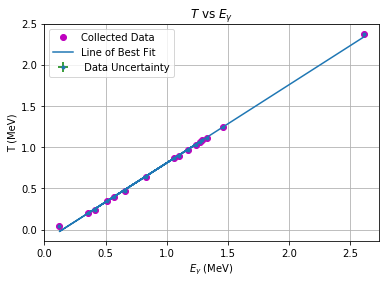

In [26]:
# Plotting Electron kinetic energy as a function of E_gamma
popt2,pcov2 = curve_fit(line, E_g, E_c, p0=[0.8,0], absolute_sigma=True)

partbLine = line(E_g,*popt2)

plt.plot(E_g,E_c,'mo',label ='Collected Data')
plt.errorbar(E_g,E_c, yerr=E_cErrors,xerr = E_gErrors, fmt='.',ecolor = 'g',label=' Data Uncertainty')
plt.plot(E_g,partbLine,label='Line of Best Fit')
plt.xlabel(r"$E_{\gamma}$ (MeV)")
plt.ylabel("T (MeV)")
plt.title(r"$T$ vs $E_\gamma$")
plt.grid(True)
plt.legend();

print(f'Data best fit slope : {popt2[0]:.3e} +\- {np.sqrt(pcov2[0,0]):.3e}')
print(f'Data best intercept : {popt2[1]:.3e} +\- {np.sqrt(pcov2[1,1]):.3e}' )

### Clasically Evaluating Electron Rest Energy

In [27]:
# Calculating Errors for Rest energy vs edge graph
def restEnErr(gamma,gammaErr, compton,comptonErr):
    part1 = (gammaErr)**2
    part2 = (2*(gamma-compton))/compton
    part3 = (comptonErr)**2
    part4 = ((compton**2)-(4*(gamma**2)))/(2*(compton**2))
    return np.sqrt(part1*(part2**2)+part3*(part4**2))

restEnergyErrors = restEnErr(E_g,E_gErrors,E_c,E_cErrors)

(array([0.47160994, 0.45758792]), 0.0012899860367389607, 0.0004598681796084637)

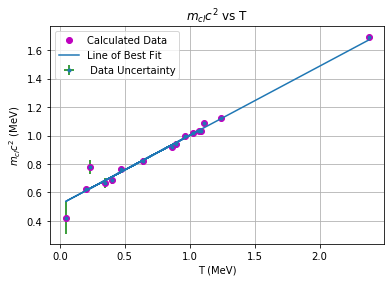

In [28]:
# Graph 2 : plotting electron rest energy vs Compton Edge

def classicRestEnergy(gamma,edge):
    numerator = (((2*gamma)-edge)**2)
    denominator = 2*edge
    return numerator/denominator

electronRestEnergy = classicRestEnergy(E_g,E_c)
params,errors = curve_fit(line, E_g, electronRestEnergy, p0=[0.88,0.545], sigma = restEnergyErrors, absolute_sigma=True)

graphx = np.linspace(0,2.5,1000)
fitLine = line(graphx,*params)

plt.plot(E_c,electronRestEnergy,'mo',label='Calculated Data')
#plt.plot(graphx,fitLine,label='Line of Best Fit')
plt.plot(E_c,line(E_c,0.486,0.515), label='Line of Best Fit') # Guess fit
plt.errorbar(E_c,electronRestEnergy,yerr=restEnergyErrors, xerr = E_cErrors,fmt='.',ecolor = 'g',label=' Data Uncertainty')
plt.xlabel("T (MeV)")
plt.ylabel(r"$m_{cl}c^2$ (MeV)")
plt.title(r"$m_{cl}c^2$ vs T")
plt.grid(True)
plt.legend();

params, np.sqrt(errors[0,0]), np.sqrt(errors[1,1])

In [29]:
electronRestEnergy # Can clearly see that the rest energy is not constant and is increasing with the higher energies of the compton edge

array([0.76435319, 0.62559447, 0.68641258, 0.91848648, 0.4193997 ,
       0.81815414, 1.01490821, 0.66654244, 1.02887938, 0.77988734,
       0.94199926, 1.03500214, 0.99484501, 1.08481165, 1.12241696,
       1.69423623])

### Evaluating Electron Rest Energy With Relativity

In [30]:
# Calculating error on relative rest energy

def relRestEnErr(gamma,gammaErr,compton,comptonErr):
    part1 = (gammaErr)**2
    part2 = ((4*gamma)/(compton))-2
    part3 = (comptonErr)**2
    part4 = (-2*(gamma**2))/(compton**2)
    return np.sqrt(part1*(part2**2)*part3*(part4**2))

relRestEnergyErrors = relRestEnErr(E_g,E_gErrors,E_c,E_cErrors)

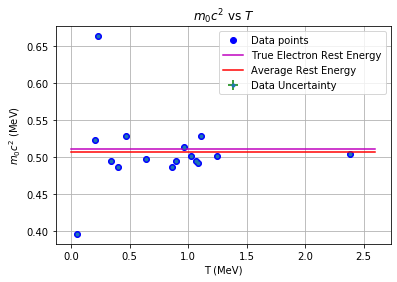

In [31]:
# Calculating rest energy of electron using relativity this time

restEnergy = params[1]

def relativityRestEnergy(compton,gamma):
    num = (2*gamma)*(gamma-compton) 
    return num/compton

theoryx = np.linspace(0,2.6,100)

rel = relativityRestEnergy(E_c,E_g)
theory = np.array([0.511]*len(theoryx))
avg =np.array([np.mean(rel)]*len(theoryx))

plt.plot(E_c,rel, 'bo',label='Data points')
plt.plot(theoryx,theory,'m-', label ='True Electron Rest Energy')
plt.plot(theoryx,avg,'r-',label='Average Rest Energy')
plt.errorbar(E_c,rel,yerr=relRestEnergyErrors, xerr=E_gErrors, fmt ='.', ecolor ='g',label ='Data Uncertainty')
plt.ylabel(r"$m_0c^2$ (MeV)")
plt.xlabel("T (MeV)")
plt.title(r"$m_0 c^2$ vs $T$")
plt.grid(True)
plt.legend();


In [32]:
E_c1 = np.array([473,205.46,398.81,865.03,641.92,1027.41,344.39,1068.26,895.18,1085.10,963.79,1112.27,1243.45,2380.49])*(1e-3)
E_g1 = np.array([661.67, 356.24, 569.37, 1062.8,833.4,1235.76,510.98,1275.45,1096.92,1291.91,1174.29,1332.86,1457.09,2610.3])*(1e-3)


rel1 = relativityRestEnergy(E_c1,E_g1)

stdError = (np.std(rel1))/(np.sqrt(len(rel1)))
mean =np.mean(rel1)
mean, stdError



(0.5031687248542274, 0.0037026907248873127)

### Beta-Momentum Relation

In [33]:
# Calcuating uncertainty on values for Beta

def betaErrors(gamma,gammaErr,compton,comptonErr):
    part1 = (gammaErr)**2
    part2a = compton*((4*compton*gamma) -(4*(gamma**2)))
    part2b = ((compton**2)-(2*gamma*compton)+(2*(gamma**2)))**2
    part2c = part2a/part2b
    part3 = (comptonErr)**2
    part4a = (-4*compton*(compton**2))+(4*(gamma**3))
    part4b = ((compton**2)-(2*gamma*compton)+(2*(gamma**2)))**2
    part4c = part4a/part4b
    return np.sqrt(part1*(part2c**2)*part3*(part4c**2))

def pcErrors(gamma,gammaErr,compton,comptonErr):
    part1 = (gammaErr)**2
    part2 = 4
    part3 = (comptonErr)**2
    part4 = 2*gammaErr
    return np.sqrt(part1*(part2**2)*part3*(part4**2))


errorsOnPc = pcErrors(E_g,E_gErrors,E_c,E_cErrors)
errorsOnBeta = betaErrors(E_g,E_gErrors,E_c,E_cErrors)

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:729: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


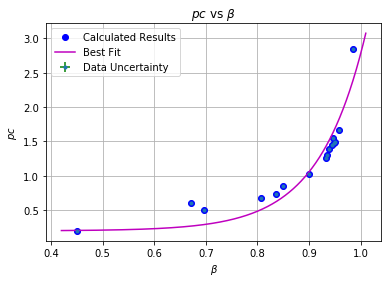

In [34]:
# Showing Other Relativistic Relations

def beta(compton,gamma):
    num = compton*((2*gamma)-compton)
    denom = (compton**2)-(2*gamma*compton)+(2*(gamma**2))
    return num/denom

def momentum(compton,gamma):
    return (2*gamma)-compton

def exponentialPCB(x,a,b): 
    return ((a)*np.exp(-b*x))+0.2

betaData = beta(E_c,E_g)
momentumData = momentum(E_c,E_g)

exp,err = curve_fit(exponentialPCB, betaData, momentumData, p0=[4.3e-5,-11.0], sigma = errorsOnPc, absolute_sigma=True)
a = np.linspace(0.42,1.01,1000)
plot = exponentialPCB(a,*exp)

plt.plot(betaData,momentumData,'bo',label='Calculated Results')
plt.plot(a,plot,'m-',label='Best Fit')
#plt.plot(a,exponentialPCB(a,4.3e-5,-11.0), 'm-', label = 'Best Fit')
plt.errorbar(betaData,momentumData,yerr=errorsOnPc, xerr=errorsOnBeta,fmt='.',ecolor='g',label='Data Uncertainty')
plt.grid(True)
plt.xlabel(r'$\beta$')
plt.ylabel(r'$pc$')
plt.title(r'$pc$ vs $\beta$')
plt.legend();

In [36]:
exp,

(array([ 4.3e-05, -1.1e+01]),)

### Energy-Gamma Relation

In [37]:
def energyErrors(gamma, gammaErr,compton,comptonErr):
    part1 = (gammaErr**2)
    part2a = (4*gamma) - (2*compton)
    part2b = compton
    part3 = (comptonErr**2)
    part4a = (compton**2) - 2*(gamma**2)
    part4b = compton**2
    return np.sqrt(part1*((part2a/part2b)**2)+ part3*((part4a/part4b)**2))

errorsOnEnergy = energyErrors(E_g,E_gErrors,E_c,E_cErrors)

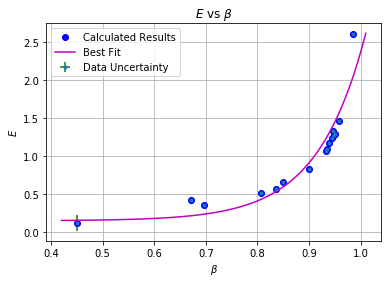

In [43]:
def totalEnergy(gamma,compton):
    num = (compton**2)-(2*compton*gamma)+(2*(gamma**2))
    return num/compton

def exponentialEB(x,a,b): 
    return ((a)*np.exp(-b*x))+0.15

totalEnergyData = totalEnergy(E_g,E_g)

poptEB, pcovEB = curve_fit(exponentialEB, betaData,totalEnergyData,p0=[5.1e-5,-10.68], sigma = errorsOnEnergy,absolute_sigma = True)

plt.plot(betaData,totalEnergyData,'bo',label='Calculated Results')
plt.errorbar(betaData,totalEnergyData,yerr=errorsOnEnergy, xerr=errorsOnBeta,fmt='.',ecolor='g',label='Data Uncertainty')
#plt.plot(a,exponentialEB(a,5.1e-5,-10.68),'m-', label = "Best Fit")
plt.plot(a,exponentialEB(a,*poptEB),label ='Best Fit')
plt.grid(True)
plt.xlabel(r'$\beta$')
plt.ylabel(r'$E$')
plt.title(r'$E$ vs $\beta$')
plt.legend();

In [39]:
poptEB, pcovEB

(array([ 6.50675694e-04, -8.27086741e+00]),
 array([[2.31430278e-12, 4.92122834e-09],
        [4.92122834e-09, 1.05677828e-05]]))

In [275]:
chi_squared_sum(totalEnergyData,exponentialEB(totalEnergyData,5.1e-5,-10.68),errorsOnEnergy)

8.12865050358848e+20

### Beta-Gamma Relation

In [276]:
# Calculating Errors on Gamma

def gammaErrors(gamma,gammaErr,compton,comptonErr):
    part1 = gammaErr**2
    part2a = -(compton**2)*((2*gamma) - compton) 
    part2b = 2*(gamma**2)*((gamma-compton)**2)
    part3 = comptonErr**2
    part4a = (2*gamma*compton)-(compton**2)
    part4b = (2*gamma)*((gamma-compton)**2)
    return np.sqrt((part1*((part2a/part2b)**2)) + (part3*((part4a/part4b)**2)))

errorsOnGamma = gammaErrors(E_g,E_gErrors,E_c,E_cErrors)

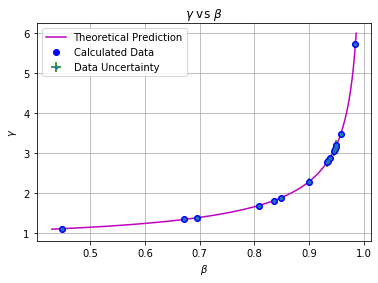

In [277]:
# Showing Beta and Gamma relation

def gamma(compton,gamma):
    bottom = (2*gamma)*(gamma - compton)
    return 1 + (compton**2)/bottom

def theoryGamma(b):
    return 1/(np.sqrt(1-(b**2)))

def exponentialGB(x,a,b): 
    return ((a)*np.exp(-b*x))+1.1

gammaData = gamma(E_c,E_g)
Gpopt,Gpcov = curve_fit(exponentialGB, betaData, gammaData, p0=[2.85e-7,-16.83], absolute_sigma=True)
betaX = np.linspace(0.43,0.986,1000)

#plt.plot(betaX,exponentialGB(betaX,2.85e-7,-16.83),'m-')
plt.plot(betaX,theoryGamma(betaX),'m-',label='Theoretical Prediction')
plt.plot(betaData,gammaData,'bo', label='Calculated Data')
#plt.plot(betaX,exponentialGB(betaX,*Gpopt))
plt.errorbar(betaData,gammaData,yerr = errorsOnGamma, xerr = errorsOnBeta, fmt='.',ecolor='g',label='Data Uncertainty')
plt.grid(True)
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\gamma$')
plt.title(r'$\gamma$ vs $\beta$')
plt.legend();

In [278]:
betaData[4], exponential(betaData,0.75e-3,-9.20)[4]
betaData

array([0.84961512, 0.69614577, 0.83530742, 0.93306337, 0.44932539,
       0.89971668, 0.94471904, 0.80784518, 0.94858036, 0.67206199,
       0.93456393, 0.95002882, 0.93773446, 0.94667916, 0.95790941,
       0.98461726])

### Data Tables

In [279]:
# Investigation 1 Data

invest1 = {'Angles (Degrees)': angles, 'Time (s)': times, 'Count':counts, 'Counts Error':countsError, 'Scattered Energy (MeV)':energies }
Data1 = pd.DataFrame(invest1)

#with open('Data1.tex','w') as tf :
    #tf.write(Data1.to_latex())
Data1

,Angles (Degrees),Time (s),Count,Counts Error,Scattered Energy (MeV)
0,20,158.78,12554,520,0.60290
1,25,189.46,12503,564,0.58085
2,30,204.70,15346,408,0.58818
3,35,165.20,10245,426,0.53706
4,40,231.26,11427,319,0.49530
5,45,272.08,10791,370,0.47529
6,50,286.50,10271,429,0.45011
7,55,329.80,10770,512,0.42681
8,60,386.46,10550,463,0.40762
9,65,409.10,10323,469,0.38742


In [27]:
# Investigation 2 Data
invest2 = {'Source':sources, 'Photopeak (MeV)':E_g, 'Compton Edge (MeV)':E_g, 'Errors (MeV)':E_cErrors}
Data2 = pd.DataFrame(invest2)
Data2

,Source,Photopeak (MeV),Compton Edge (MeV),Errors (MeV)
0,Cs-137,0.66167,0.66167,0.001500
1,Ba-133,0.35624,0.35624,0.000000
2,Bi-207,0.56937,0.56937,0.008445
3,Bi-207,1.06280,1.06280,0.008450
4,Co-57,0.12315,0.12315,0.008435
5,Mn-54,0.83340,0.83340,0.008435
6,Co-56,1.23576,1.23576,0.008435
7,Na-22,0.51098,0.51098,0.008455
8,Na-22,1.27545,1.27545,0.008460
9,In-116,0.41742,0.41742,0.008440


In [251]:
# Differentail Cross Sections
invest1b = {'Angle(Radians)':anglesRad, 'TheoreticalPrediction(Klein-Nishina)': theoryKN, 'CalculatedData':Differential_CS(Gsum,Ne) }
DiffCrossSec = pd.DataFrame(invest1b)
DiffCrossSec['Difference'] = np.abs(DiffCrossSec['TheoreticalPrediction(Klein-Nishina)']- DiffCrossSec['CalculatedData'])
with open('DiffCrossSec.tex','w') as tf :
    tf.write(DiffCrossSec.to_latex())

DiffCrossSec


,Angle(Radians),TheoreticalPrediction(Klein-Nishina),CalculatedData,Difference
0,0.349066,6.464625e-26,9.014942e-27,5.563130e-26
1,0.436332,5.805819e-26,7.213532e-27,5.084466e-26
2,0.523599,5.132311e-26,8.311828e-27,4.301128e-26
3,0.610865,4.483682e-26,6.202997e-27,3.863383e-26
4,0.698132,3.887281e-26,4.509401e-27,3.436341e-26
5,0.785398,3.358724e-26,3.454376e-27,3.013286e-26
6,0.872665,2.904028e-26,2.935758e-27,2.610452e-26
7,0.959931,2.522312e-26,2.517993e-27,2.270513e-26
8,1.047198,2.208347e-26,1.998072e-27,2.008540e-26
9,1.134464,1.954600e-26,1.743578e-27,1.780242e-26


In [40]:
#Electron Rest Energies

invest2b = {'Sources':sources, 'ComptonEdge(MeV)':E_c, 'ClassicRestEnergy(MeV)':electronRestEnergy, 'RelativityRestEnergy(MeV)':rel}
RestEnergy = pd.DataFrame(invest2b)
RestEnergy = RestEnergy.sort_values(by='ComptonEdge(MeV)')

with open('RestEnergy.tex','w') as tf :
    tf.write(RestEnergy.to_latex())

RestEnergy

,Sources,ComptonEdge(MeV),ClassicRestEnergy(MeV),RelativityRestEnergy(MeV)
4,Co-57,0.04724,0.419400,0.395780
1,Ba-133,0.20546,0.625594,0.522864
9,In-116,0.23256,0.779887,0.663607
7,Na-22,0.34439,0.666542,0.494347
2,Bi-207,0.39881,0.686413,0.487008
0,Cs-137,0.47300,0.764353,0.527853
5,Mn-54,0.64192,0.818154,0.497194
3,Bi-207,0.86503,0.918486,0.485971
10,In-116,0.89518,0.941999,0.494409
12,Co-60,0.96379,0.994845,0.512950


In [211]:
# Beta, Gamma, Momentum, Total Energy Data

invest2c = {'Sources':sources, 'Beta':betaData,'Momentum':momentumData, 'Total Energy(MeV)':totalEnergyData,'Gamma':gammaData}
Relations = pd.DataFrame(invest2c)
Relations

#with open('Relations1.tex','w') as f:
    #f.write(Relations.to_latex())

,Sources,Beta,Momentum,Total Energy(MeV),Gamma
0,Cs-137,0.849615,0.85034,0.66167,1.896082
1,Ba-133,0.696146,0.50702,0.35624,1.392951
2,Bi-207,0.835307,0.73993,0.56937,1.818899
3,Bi-207,0.933063,1.26057,1.06280,2.780002
4,Co-57,0.449325,0.19906,0.12315,1.119359
5,Mn-54,0.899717,1.02488,0.83340,2.291085
6,Co-56,0.944719,1.44411,1.23576,3.049887
7,Na-22,0.807845,0.67757,0.51098,1.696656
8,Na-22,0.948580,1.48264,1.27545,3.159194
9,In-116,0.672062,0.60228,0.41742,1.350448


### Hello 
